In [1]:
import math
import random 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm, ttest_1samp

- 1. Suppose we want to test whether the mean weight of apples in a grocery store is 150 grams. We randomly sample 20 apples from the store and measure their weights, getting the following data:
    - Apple_weights = [145, 155, 160, 146, 142, 152, 150, 147, 148, 149, 148, 152, 153, 155, 154, 148, 151, 147, 153, 146]

        - What test should we use and why?
        - State the null and alternative hypotheses.
        - Choose a significance level (α) (the probability of rejecting the null hypothesis when it is actually true).
        - Determine the degrees of freedom (df) of the sample.
        - Determine the critical value of t based on the significance level and degrees of freedom. For a two-tailed test with α = 0.05 and df = 19, the critical values are -2.093 and 2.093.
        - Compare and interpret the results of the test to the critical value 

- 1. ***Solution:***
    - We should use one sample T-test.
    - Null Hypothesis $H_{0}$: the mean weight of apples in a grocery store is 150 grams
    - Alternative Hypotheis $H_{1}$: the mean weight of apples in a grocery store is different from 150 grams
    - The **degree of freedom** df = sample size - 1 = 20 - 1 = 19

In [2]:
Apple_weights = [145, 155, 160, 146, 142, 152, 150, 147, 148, 149, 148, 152, 153, 155, 154, 148, 151, 147, 153, 146]

# Define the null hypothesis value (the population mean)
pop_mean = 150

alpha = 0.05

print('The hypothesis test required is One-Sample T-Test')
print('H0: the population mean equal %d'%pop_mean)
print('H1: the population mean not equal %d'%pop_mean)

# Perform the one-sample t-test
t_stat, p_value = ttest_1samp(Apple_weights, pop_mean)

# Print the results
print('t-statistic: %.2f' % t_stat)
print('p-value: %.3f' % p_value)

critical_value = 2.093

if t_stat <= critical_value:
    print('Fail to reject H0 (Accept H0). The mean of the population is eaual to', pop_mean)
else:
    print('Reject H0 (Accept H1). The mean of the population is NOT equal to', pop_mean)
    
if p_value > alpha:
    print('Fail to reject H0 (Accept H0). The mean of the population is eaual to', pop_mean)
else:
    print('Reject H0 (Accept H1). The mean of the population is NOT equal to', pop_mean)

df = len(Apple_weights)-1

print('The degree of fredom = %d'% df)

cv = t.ppf(1-alpha/2, df) # critical value
print('The critical value given the degree of freedom and the alpha = (+/-) %.3f'% cv)

The hypothesis test required is One-Sample T-Test
H0: the population mean equal 150
H1: the population mean not equal 150
t-statistic: 0.05
p-value: 0.959
Fail to reject H0 (Accept H0). The mean of the population is eaual to 150
Fail to reject H0 (Accept H0). The mean of the population is eaual to 150
The degree of fredom = 19
The critical value given the degree of freedom and the alpha = (+/-) 2.093


![t-table-one-sample-t-test-min.png](t-table-one-sample-t-test-min.png)

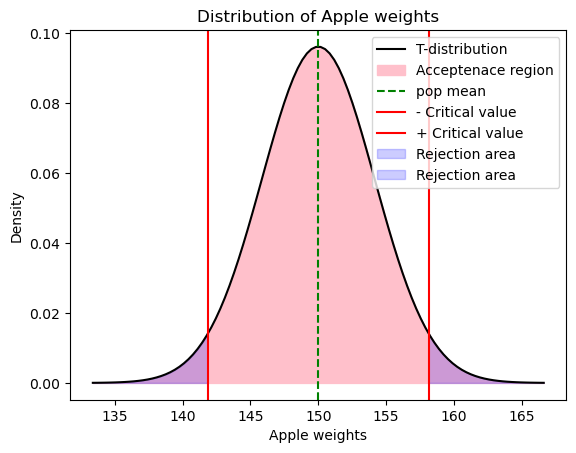

In [3]:
# Set the mean and standard deviation
mu = pop_mean
sigma = np.array(Apple_weights).std()

# Create a range of x-values
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)

# Create the normal distribution
y = norm.pdf(x, mu, sigma)

alpha = 0.05
lower, upper = norm.interval(1-alpha, loc=mu, scale=sigma)

x_shade1 = np.linspace(mu - 4*sigma, lower, 50)
y_shade1 = norm.pdf(x_shade1, mu, sigma)

x_shade2 = np.linspace(mu + 4*sigma, upper, 50)
y_shade2 = norm.pdf(x_shade2, mu, sigma)

# Plot the distribution with the area under the curve shaded
plt.plot(x, y, color='black', label='t-distribution')
plt.fill_between(x, y, color='pink')

# Plot the mean line
plt.axvline(mu, color='green', linestyle='--')

# Plot the significance level line on both sides
plt.axvline(lower, color='red')
plt.axvline(upper, color='red')

# plt.fill_between(x, y, where=(x < mu-2*sigma) | (x > mu+2*sigma), color='blue')
# plt.fill_between(x, y, where=(x <= mu-2*sigma) | (x >= mu+2*sigma), color='blue')
plt.fill_between(x_shade1, y_shade1, color='blue', alpha=0.2)
plt.fill_between(x_shade2, y_shade2, color='blue', alpha=0.2)

# Add labels and a title to the plot
plt.xlabel('Apple weights')
plt.ylabel('Density')
plt.title('Distribution of Apple weights')

plt.legend(['T-distribution', 'Acceptenace region', 'pop mean', '- Critical value', '+ Critical value', 'Rejection area', 'Rejection area'])

# Show the plot
plt.show()

2. Suppose we want to test whether the mean height of all men in a population is 180 cm assuming that the population standard deviation = 2. We randomly sample 50 men from the population and measure their heights, getting the following data:
    - Men_height = [177, 180, 182, 179, 178, 181, 176, 183, 179, 180, 178, 181, 177, 178, 180, 179, 182, 180, 183, 181, 179, 177, 180, 181, 178, 180, 182, 179, 177, 182, 178, 181, 183, 179, 180, 181, 183, 178, 177, 181, 179, 182, 180, 181, 178, 180, 179, 181, 183, 179]

        - What test should we use and why?
        - State the null and alternative hypotheses.
        - Choose a significance level (α) (the probability of rejecting the null hypothesis when it is actually true).
        - Determine the degrees of freedom (df) of the sample.
        - Determine the critical value of t based on the significance level and degrees of freedom. For a two-tailed test with α = 0.05 and df.
        - Compare and interpret the results of the test to the critical value

- 2. ***Solution:***
    - We should use one sample T-test.
    - Null Hypothesis $H_{0}$: the mean height of all mall men in a population is different from 180 cm
    - The **degree of freedom** df = sample size - 1 = 50 - 1 = 49
    - The critical t-value is ±2.0096

In [4]:
Men_height = [177, 180, 182, 179, 178, 181, 176, 183, 179, 180, 178, 181, 177, 178, 180, 179, 182, 180, 183, 181, 179, 177, 180, 181, 178, 180, 182, 179, 177, 182, 178, 181, 183, 179, 180, 181, 183, 178, 177, 181, 179, 182, 180, 181, 178, 180, 179, 181, 183, 179]

sample_mean = np.array(Men_height).mean()
sample_size = len(Men_height)

# Define the null hypothesis value (the population mean)
pop_mean = 180
pop_stddev = 2

# Significance level
alpha = 0.05

print('The hypothesis test required is Z-Test since the population Std is known and the sample size %d > 30'%sample_size)
print('H0: the population mean equal %d'%pop_mean)
print('H1: the population mean not equal %d'%pop_mean)

z = (sample_mean - pop_mean) / (pop_stddev / math.sqrt(sample_size))
p_value = 2 * (1 - norm.cdf(abs(z)))

print('Population mean: %.3f' % pop_mean)
print('Population Std: %.3f' % sample_mean)
print('Sample mean: %.3f' % np.array(Men_height).mean())
print('p-value: %.3f' % p_value)

# Check if the p-value is less than alpha
if p_value > alpha:
    print('Fail to reject H0 (Accept H0). The mean of the population is equal to', pop_mean)
else:
    print('Reject H0 (Accept H1). The mean of the population is NOT equal to', pop_mean)
    
df = len(Men_height)-1

print('The degree of fredom = %d'% df)

cv = t.ppf(1-alpha/2, df) # critical value
print('The critical value given the degree of freedom and the alpha = (+/-) %.3f'% cv)

The hypothesis test required is Z-Test since the population Std is known and the sample size 50 > 30
H0: the population mean equal 180
H1: the population mean not equal 180
Population mean: 180.000
Population Std: 179.840
Sample mean: 179.840
p-value: 0.572
Fail to reject H0 (Accept H0). The mean of the population is equal to 180
The degree of fredom = 49
The critical value given the degree of freedom and the alpha = (+/-) 2.010


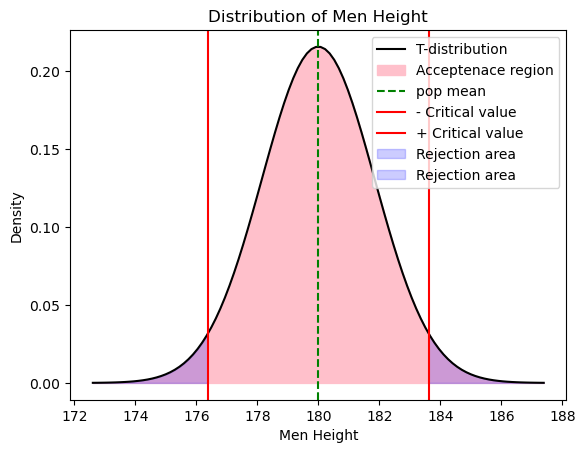

In [5]:
# Set the mean and standard deviation
mu = pop_mean
sigma = np.array(Men_height).std()

# Create a range of x-values
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)

# Create the normal distribution
y = norm.pdf(x, mu, sigma)

alpha = 0.05
lower, upper = norm.interval(1-alpha, loc=mu, scale=sigma)

x_shade1 = np.linspace(mu - 4*sigma, lower, 50)
y_shade1 = norm.pdf(x_shade1, mu, sigma)

x_shade2 = np.linspace(mu + 4*sigma, upper, 50)
y_shade2 = norm.pdf(x_shade2, mu, sigma)

# Plot the distribution with the area under the curve shaded
plt.plot(x, y, color='black')
plt.fill_between(x, y, color='pink')

# Plot the mean line
plt.axvline(mu, color='green', linestyle='--')

# Plot the significance level line on both sides
plt.axvline(lower, color='red')
plt.axvline(upper, color='red')

# plt.fill_between(x, y, where=(x < mu-2*sigma) | (x > mu+2*sigma), color='blue')
# plt.fill_between(x, y, where=(x <= mu-2*sigma) | (x >= mu+2*sigma), color='blue')
plt.fill_between(x_shade1, y_shade1, color='blue', alpha=0.2)
plt.fill_between(x_shade2, y_shade2, color='blue', alpha=0.2)

# Add labels and a title to the plot
plt.xlabel('Men Height')
plt.ylabel('Density')
plt.title('Distribution of Men Height')

plt.legend(['T-distribution', 'Acceptenace region', 'pop mean', '- Critical value', '+ Critical value', 'Rejection area', 'Rejection area'])

# Show the plot
plt.show()

- 3. Suppose we want to test whether the mean weight of a population of cats is different from 4 kg. We randomly sample 50 cats from the population and measure their weights, getting the following data:

    - Cats_weights = [3.9, 4.2, 4.5, 4.1, 4.3, 3.8, 4.6, 4.2, 3.7, 4.3, 3.9, 4.0, 4.1, 4.5, 4.2, 3.8, 3.9, 4.3, 4.1, 4.0, 4.4, 4.2, 4.1, 4.6, 4.4, 4.2, 4.1, 4.3, 4.0, 4.4, 4.3, 3.8, 4.1, 4.5, 4.2, 4.3, 4.0, 4.1, 4.2, 3.9, 4.3, 3.7, 4.1, 4.5, 4.2, 4.0, 4.2, 4.4, 4.1, 4.5]

        - Perform one sample two tailed Z-Test to determine whether the mean weight of the sampled cats is significantly different from 4 kg.
        - State the null and alternative hypotheses.
        - Choose a significance level (α) (the probability of rejecting the null hypothesis when it is actually true).
        - Calculate the z-score using the formula:
        - Assuming that the standard deviation is equal to the sample mean
        - Look up the critical z-value at the chosen significance level (α) using a z-table.
        - Compare the calculated z-score to the critical z-values. If the calculated z-score falls outside the range between the critical z-values, we reject the null hypothesis in favor of the alternative hypothesis.

In [6]:
Cats_weights = [3.9, 4.2, 4.5, 4.1, 4.3, 3.8, 4.6, 4.2, 3.7, 4.3, 3.9, 4.0, 4.1, 4.5, 4.2, 3.8, 3.9, 4.3, 4.1, 4.0, 4.4, 4.2, 4.1, 4.6, 4.4, 4.2, 4.1, 4.3, 4.0, 4.4, 4.3, 3.8, 4.1, 4.5, 4.2, 4.3, 4.0, 4.1, 4.2, 3.9, 4.3, 3.7, 4.1, 4.5, 4.2, 4.0, 4.2, 4.4, 4.1, 4.5]

sample_mean = np.array(Cats_weights).mean()
sample_size = len(Cats_weights)

# Define the null hypothesis value (the population mean)
pop_mean = 4
pop_stddev = sample_mean#np.array(Cats_weights).std()

# Significance level
alpha = 0.05

print('The hypothesis test required is Z-Test since the population Std is known and the sample size %d > 30'%sample_size)
print('H0: the population mean equal %d'%pop_mean)
print('H1: the population mean not equal %d'%pop_mean)

z = (sample_mean - pop_mean) / (pop_stddev / math.sqrt(sample_size))
p_value = 2 * (1 - norm.cdf(abs(z)))

print('Population mean: %.3f' % pop_mean)
print('Population Std: %.3f' % sample_mean)
print('Sample mean: %.3f' % np.array(Men_height).mean())

print('Z-value: %.3f' % z)
print('p-value: %.3f' % p_value)

# Check if the p-value is less than alpha
if p_value > alpha:
    print('Fail to reject H0 (Accept H0). The mean of the population is equal to', pop_mean)
else:
    print('Reject H0 (Accept H1). The mean of the population is NOT equal to', pop_mean)
    
df = len(Men_height)-1

print('The degree of fredom = %d'% df)

cv = t.ppf(1-alpha/2, df) # critical value
print('The critical value given the degree of freedom and the alpha = (+/-) %.3f'% cv)

The hypothesis test required is Z-Test since the population Std is known and the sample size 50 > 30
H0: the population mean equal 4
H1: the population mean not equal 4
Population mean: 4.000
Population Std: 4.170
Sample mean: 179.840
Z-value: 0.288
p-value: 0.773
Fail to reject H0 (Accept H0). The mean of the population is equal to 4
The degree of fredom = 49
The critical value given the degree of freedom and the alpha = (+/-) 2.010


## Example for showing the one sample T-test

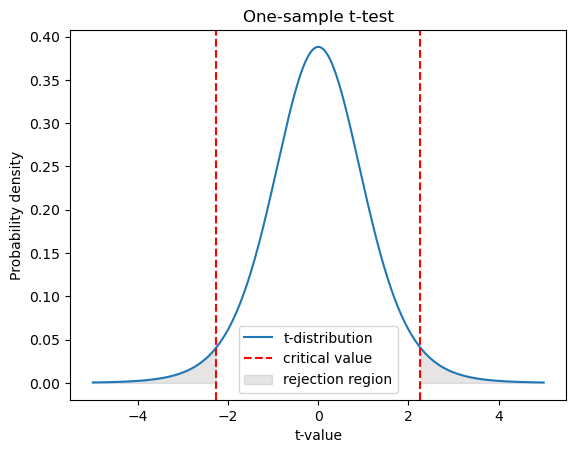

2.2621571627409915

In [7]:
# Define the sample data and population mean
sample_data = [2.3, 3.5, 4.1, 3.8, 4.0, 3.4, 3.7, 3.9, 4.2, 3.6]
pop_mean = 3.5

# Define the degrees of freedom and significance level
df = len(sample_data) - 1
alpha = 0.05

# Calculate the critical values
t_critical = t.ppf(1 - alpha/2, df)

# Define the x-axis values
x = np.linspace(-5, 5, 500)

# Calculate the y-axis values
y = t.pdf(x, df)

# Plot the t-distribution
fig, ax = plt.subplots()
ax.plot(x, y, label='t-distribution')

# Shade the rejection regions
ax.axvline(x=-t_critical, color='red', linestyle='--', label='critical value')
ax.axvline(x=t_critical, color='red', linestyle='--')
ax.fill_between(x, 0, y, where=(x < -t_critical), color='gray', alpha=0.2, label='rejection region')
ax.fill_between(x, 0, y, where=(x > t_critical), color='gray', alpha=0.2)

# Add labels and legend
ax.set_title('One-sample t-test')
ax.set_xlabel('t-value')
ax.set_ylabel('Probability density')
ax.legend()
plt.show()
t_critical